In [1]:
!pip install seaborn

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


In [2]:
from __future__ import absolute_import,division,print_function

In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.10.0


In [4]:
df = pd.read_csv('finalBCN17clean.csv',sep=';',low_memory=False)
pd.set_option('display.max_columns', 452)

In [5]:
df.isna().sum()

Destination Airport      0
Marketing Airline        0
 Airline Share           0
 Passengers              0
 Avg. Base Fare(USD)     0
 Avg. Total Fare(USD)    0
 Base Revenue(USD)       0
 Total Revenue(USD)      0
 PPDEW                   0
Distance (km)            0
dtype: int64

In [6]:
dataset = df.copy()

In [7]:
dataset.dtypes
#dataset['Destination Airport']
#dataset['Destination Airport'].unique()
df.head()

,Destination Airport,Marketing Airline,Airline Share,Passengers,Avg. Base Fare(USD),Avg. Total Fare(USD),Base Revenue(USD),Total Revenue(USD),PPDEW,Distance (km)
0,MAD,0B,0,"1,36","52,26","74,66",71,102,0,504
1,MAD,0Z,0,"1,57","46,99","69,58",74,109,0,504
2,MAD,0Z,0,"6,47","62,07","84,5",402,547,"0,1",504
3,MAD,2C,0,"2,64","44,89","73,22",119,193,0,504
4,MAD,2C,0,"4,22","43,99","67,95",186,287,0,504


In [8]:
dest_type = CategoricalDtype(['OTP','IAS','BVA','MAD','PNA','TNG','NNE','SXF','YJV','ZAZ','VLC','NDR','CMN','FEZ','LHR','RJL','GUA','ALC','TXL','HAJ',
'HAM','DUS','VIE','GVA','STO','VRN','MIL','KIV','ARN','TLV','OPO','KBP','GRU','PAR','GIR','PGF','TUD','GRO','LOG','PMI','REU','EEL','TAR','FNI','VIT','ILD',
'QGN','TAF','VGO','ALS','ODB','BIO','AGP','SVQ','EAS','GDU','AND','IRN','CDG','GLA','AMS','ATH','MUC','MIA','JFK','CAS','LAX','PHL','MCO','CGF','DOH','ORD','CLT','CLE','IAH','OAK','RDU','BOS',
'SFO','FRA','BHX','LBA','YYZ','ZRH','EWR','YUL','IAD','MJV','NYC','ATL','TFN','ABQ','ORN','CTA','EZE','FCO','BOG','SJU','IST','HEL','NRT','LIN','AMM','MSQ','LGW','ORY','MXP','DUB','VCE',
'BRU','NCE','NAP','FLR','CPH','PRG','LTN','EDI','MAN','NCL','LYS','OSL','ORK','RIX','PEK','PVG','HAV','HKG','LCG','LPA','KEF','BLL','TFS','AAL',
'WAW','BGO','SVG','TRD','GOT','NIO','DBV','JSU','CPN','DXB','GTW','FLL','SCQ','GRX','NUE','BER','BSL','BRS','LPL','BKK','CMB','LEF','CGK','SVO','RTM','TRM',
'LEN','BJZ','OVD','LIM','DME','LEI','NTE','RNS','LED','PMO','BOD','MRS','BJL','DKR','SPC','TLS','BRI','CAG','ACC','ZAG','JTR','CWL','OLB','IEV','LIL','BEY','FAO',
'BES','SPU','FNC','BEG','BDS','TUN','PUJ','KGD','TRS','JMK','HER','TLL','LCA','CFU','BIA','SKG','ZAD','CLJ','MLN','MAM','GYD','ICN','LBS','CAI','NGO','KIX','CTS','SIN','YVR','SAW','ISB','LHE','KHI','HVN','KTM',
'KUL','FAE','BFS','LON','GOA','SOF','RHE','STN','BGY','IBZ','TSF','MAH','BUD','BLQ','WMI','VLL','FUE','EMA','TRN','ACE','RAK','PIK','SDR','XRY','VNO','NYO','BGI','SCW','APG','TSG',
'AAR','CRL','BNG','DTN','BUH','SXB','GLS','TNR','MLA','PSA','FKB','BGM','HAN','LLE','PSR','EIN','GLW','BXH','BMO','DUN','CLR','ELX','LIS','ALG','PAM','EVN','PDL','MEL',
'VKO','OST','ANR','MCT','NAH','SLL','SEN','MLH','SFX','NOC','PLP','MPX','CDB','STD','KRK','LUX','FMM','BTS','ROM','EAM','IBA','VOG','CGO','BCL','CGD','SGF','CSL','BHD','MAX','LUT',
'MXO','LCY','LYN','BLS','SVX','GDN','GRA','SCL','KIS','OMI','ACL','KCG','RTN','PVD','TUR','AMD','LXG','MAG','LFR','GRC','RNE','LCB','TCN','CDP','PER','SQC','BID','LPS','NAD','FRL',
'SBQ','ATR','TNF','SCG','APR','ABP','PVK','ZHR','AGO','CLG','MPI','OBD','LGC','BQL','BCE','MAS','RNN','MOW','GRS','LGS','ZTH','VAW','FLO','LAG','ALV','KUN','IKA','KTW','TSR','SKP',
'POZ','CRA','BUC','SBZ','THR','OYP','GND','DEN','TPA','BWE','FOR','HRK','YYC','YOW','LCF','PAD','LNZ','LWO','CPT','BIR','MMA','TCI','SLC','EAP','GEG','SDQ','MRU','MNL','LDS','MAA','CWB','ILO','MBJ','SEG','POP','NAS','POS','VAR','ADZ','CJB',
'SAP','IXR','CUN','STT','MEX','UVF','SVD','GOI','AYT','GDL','COR','KIN','IMF','ARU','IXE','TRZ','YQG','BLR','JNB','GBE','DVO','BOM','AQP','DEL','IXM','KNO','SOC','ODS','JOG','DTW','ADA','TRC','CND','TAG','CBO','BCD','JKT','RTB','TAO','RGN','LCE','CGN','STR',
])

dataset['Destination Airport'] = dataset['Destination Airport'].astype(dest_type).cat.codes
dataset['Destination Airport'] = dataset['Destination Airport']+1
dataset.tail()

,Destination Airport,Marketing Airline,Airline Share,Passengers,Avg. Base Fare(USD),Avg. Total Fare(USD),Base Revenue(USD),Total Revenue(USD),PPDEW,Distance (km)
12519,25,ZZ,100,"11,85","89,96","137,05",1066,1624,"0,2",2289
12520,149,ZZ,100,"1,5","68,17","125,91",102,189,0,1496
12521,25,ZZ,100,"12,4","59,03","105,68",732,1311,"0,2",2289
12522,450,ZZ,100,"1,47","369,5","574,99",543,845,0,8810
12523,34,ZZ,100,"2,66","41,05","79,48",109,212,0,842


In [9]:
destination = dataset.pop('Destination Airport')
base_rev = dataset.pop(' Base Revenue(USD)')
destination

0          4
1          4
2          4
3          4
4          4
5          4
6          4
7          4
8          4
9          4
10         4
11         4
12         4
13         4
14         4
15        18
16         4
17         4
18         4
19         4
20         4
21         4
22         4
23         4
24         4
25        24
26         8
27         8
28        29
29         4
        ... 
12494    269
12495    209
12496    390
12497     25
12498     25
12499    391
12500    393
12501     25
12502    225
12503    298
12504    398
12505     25
12506     25
12507     27
12508    276
12509    403
12510    411
12511    149
12512    403
12513     25
12514     27
12515    298
12516    442
12517    444
12518    446
12519     25
12520    149
12521     25
12522    450
12523     34
Name: Destination Airport, Length: 12524, dtype: int16

In [10]:
dataset['OTP'] = (destination==1)*1.0
dataset['IAS'] = (destination==2)*1.0
dataset['BVA'] = (destination==3)*1.0
dataset['MAD'] = (destination==4)*1.0
dataset['PNA'] = (destination==5)*1.0
dataset['TNG'] = (destination==6)*1.0
dataset['NNE'] = (destination==7)*1.0
dataset['SXF'] = (destination==8)*1.0
dataset['YJV'] = (destination==9)*1.0
dataset['ZAZ'] = (destination==10)*1.0
dataset['VLC'] = (destination==11)*1.0
dataset['NDR'] = (destination==12)*1.0
dataset['CMN'] = (destination==13)*1.0
dataset['FEZ'] = (destination==14)*1.0
dataset['LHR'] = (destination==15)*1.0
dataset['RJL'] = (destination==16)*1.0
dataset['GUA'] = (destination==17)*1.0
dataset['ALC'] = (destination==18)*1.0
dataset['TXL'] = (destination==19)*1.0
dataset['HAJ'] = (destination==20)*1.0
dataset['HAM'] = (destination==21)*1.0
dataset['DUS'] = (destination==22)*1.0
dataset['VIE'] = (destination==23)*1.0
dataset['GVA'] = (destination==24)*1.0
dataset['STO'] = (destination==25)*1.0
dataset['VRN'] = (destination==26)*1.0
dataset['MIL'] = (destination==27)*1.0
dataset['KIV'] = (destination==28)*1.0
dataset['ARN'] = (destination==29)*1.0
dataset['TLV'] = (destination==30)*1.0
dataset['OPO'] = (destination==31)*1.0
dataset['KBP'] = (destination==32)*1.0
dataset['GRU'] = (destination==33)*1.0
dataset['PAR'] = (destination==34)*1.0
dataset['GIR'] = (destination==35)*1.0
dataset['PGF'] = (destination==36)*1.0
dataset['TUD'] = (destination==37)*1.0
dataset['GRO'] = (destination==38)*1.0
dataset['LOG'] = (destination==39)*1.0
dataset['PMI'] = (destination==40)*1.0
dataset['REU'] = (destination==41)*1.0
dataset['EEL'] = (destination==42)*1.0
dataset['TAR'] = (destination==43)*1.0
dataset['FNI'] = (destination==44)*1.0
dataset['VIT'] = (destination==45)*1.0
dataset['ILD'] = (destination==46)*1.0
dataset['QGN'] = (destination==47)*1.0
dataset['TAF'] = (destination==48)*1.0
dataset['VGO'] = (destination==49)*1.0
dataset['ALS'] = (destination==50)*1.0
dataset['ODB'] = (destination==51)*1.0
dataset['BIO'] = (destination==52)*1.0
dataset['AGP'] = (destination==53)*1.0
dataset['SVQ'] = (destination==54)*1.0
dataset['EAS'] = (destination==55)*1.0
dataset['GDU'] = (destination==56)*1.0
dataset['AND'] = (destination==57)*1.0
dataset['IRN'] = (destination==58)*1.0
dataset['CDG'] = (destination==59)*1.0
dataset['GLA'] = (destination==60)*1.0
dataset['AMS'] = (destination==61)*1.0
dataset['ATH'] = (destination==62)*1.0
dataset['MUC'] = (destination==63)*1.0
dataset['MIA'] = (destination==64)*1.0
dataset['JFK'] = (destination==65)*1.0
dataset['CAS'] = (destination==66)*1.0
dataset['LAX'] = (destination==67)*1.0
dataset['PHL'] = (destination==68)*1.0
dataset['MCO'] = (destination==69)*1.0
dataset['CGF'] = (destination==70)*1.0
dataset['DOH'] = (destination==71)*1.0
dataset['ORD'] = (destination==72)*1.0
dataset['CLT'] = (destination==73)*1.0
dataset['CLE'] = (destination==74)*1.0
dataset['IAH'] = (destination==75)*1.0
dataset['OAK'] = (destination==76)*1.0
dataset['RDU'] = (destination==77)*1.0
dataset['BOS'] = (destination==78)*1.0
dataset['SFO'] = (destination==79)*1.0
dataset['FRA'] = (destination==80)*1.0
dataset['BHX'] = (destination==81)*1.0
dataset['LBA'] = (destination==82)*1.0
dataset['YYZ'] = (destination==83)*1.0
dataset['ZRH'] = (destination==84)*1.0
dataset['EWR'] = (destination==85)*1.0
dataset['YUL'] = (destination==86)*1.0
dataset['IAD'] = (destination==87)*1.0
dataset['MJV'] = (destination==88)*1.0
dataset['NYC'] = (destination==89)*1.0
dataset['ATL'] = (destination==90)*1.0
dataset['TFN'] = (destination==91)*1.0
dataset['ABQ'] = (destination==92)*1.0
dataset['ORN'] = (destination==93)*1.0
dataset['CTA'] = (destination==94)*1.0
dataset['EZE'] = (destination==95)*1.0
dataset['FCO'] = (destination==96)*1.0
dataset['BOG'] = (destination==97)*1.0
dataset['SJU'] = (destination==98)*1.0
dataset['IST'] = (destination==99)*1.0
dataset['HEL'] = (destination==100)*1.0
dataset['NRT'] = (destination==101)*1.0
dataset['LIN'] = (destination==102)*1.0
dataset['AMM'] = (destination==103)*1.0
dataset['MSQ'] = (destination==104)*1.0
dataset['LGW'] = (destination==105)*1.0
dataset['ORY'] = (destination==106)*1.0
dataset['MXP'] = (destination==107)*1.0
dataset['DUB'] = (destination==108)*1.0
dataset['VCE'] = (destination==109)*1.0
dataset['BRU'] = (destination==110)*1.0
dataset['NCE'] = (destination==111)*1.0
dataset['NAP'] = (destination==112)*1.0
dataset['FLR'] = (destination==113)*1.0
dataset['CPH'] = (destination==114)*1.0
dataset['PRG'] = (destination==115)*1.0
dataset['LTN'] = (destination==116)*1.0
dataset['EDI'] = (destination==117)*1.0
dataset['MAN'] = (destination==118)*1.0
dataset['NCL'] = (destination==119)*1.0
dataset['LYS'] = (destination==120)*1.0
dataset['OSL'] = (destination==121)*1.0
dataset['ORK'] = (destination==122)*1.0
dataset['RIX'] = (destination==123)*1.0
dataset['PEK'] = (destination==124)*1.0
dataset['PVG'] = (destination==125)*1.0
dataset['HAV'] = (destination==126)*1.0
dataset['HKG'] = (destination==127)*1.0
dataset['LCG'] = (destination==128)*1.0
dataset['LPA'] = (destination==129)*1.0
dataset['KEF'] = (destination==130)*1.0
dataset['BLL'] = (destination==131)*1.0
dataset['TFS'] = (destination==132)*1.0
dataset['AAL'] = (destination==133)*1.0
dataset['WAW'] = (destination==134)*1.0
dataset['BGO'] = (destination==135)*1.0
dataset['SVG'] = (destination==136)*1.0
dataset['TRD'] = (destination==137)*1.0
dataset['GOT'] = (destination==138)*1.0
dataset['NIO'] = (destination==139)*1.0
dataset['DBV'] = (destination==140)*1.0
dataset['JSU'] = (destination==141)*1.0
dataset['CPN'] = (destination==142)*1.0
dataset['DXB'] = (destination==143)*1.0
dataset['GTW'] = (destination==144)*1.0
dataset['FLL'] = (destination==145)*1.0
dataset['SCQ'] = (destination==146)*1.0
dataset['GRX'] = (destination==147)*1.0
dataset['NUE'] = (destination==148)*1.0
dataset['BER'] = (destination==149)*1.0
dataset['BSL'] = (destination==150)*1.0
dataset['BRS'] = (destination==151)*1.0
dataset['LPL'] = (destination==152)*1.0
dataset['BKK'] = (destination==153)*1.0
dataset['CMB'] = (destination==154)*1.0
dataset['LEF'] = (destination==155)*1.0
dataset['CGK'] = (destination==156)*1.0
dataset['SVO'] = (destination==157)*1.0
dataset['RTM'] = (destination==158)*1.0
dataset['TRM'] = (destination==159)*1.0
dataset['LEN'] = (destination==160)*1.0
dataset['BJZ'] = (destination==161)*1.0
dataset['OVD'] = (destination==162)*1.0
dataset['LIM'] = (destination==163)*1.0
dataset['DME'] = (destination==164)*1.0
dataset['LEI'] = (destination==165)*1.0
dataset['NTE'] = (destination==166)*1.0
dataset['RNS'] = (destination==167)*1.0
dataset['LED'] = (destination==168)*1.0
dataset['PMO'] = (destination==169)*1.0
dataset['BOD'] = (destination==170)*1.0
dataset['MRS'] = (destination==171)*1.0
dataset['BJL'] = (destination==172)*1.0
dataset['DKR'] = (destination==173)*1.0
dataset['SPC'] = (destination==174)*1.0
dataset['TLS'] = (destination==175)*1.0
dataset['BRI'] = (destination==176)*1.0
dataset['CAG'] = (destination==177)*1.0
dataset['ACC'] = (destination==178)*1.0
dataset['ZAG'] = (destination==179)*1.0
dataset['JTR'] = (destination==180)*1.0
dataset['CWL'] = (destination==181)*1.0
dataset['OLB'] = (destination==182)*1.0
dataset['IEV'] = (destination==183)*1.0
dataset['LIL'] = (destination==184)*1.0
dataset['BEY'] = (destination==185)*1.0
dataset['FAO'] = (destination==186)*1.0
dataset['BES'] = (destination==187)*1.0
dataset['SPU'] = (destination==188)*1.0
dataset['FNC'] = (destination==189)*1.0
dataset['BEG'] = (destination==190)*1.0
dataset['BDS'] = (destination==191)*1.0
dataset['TUN'] = (destination==192)*1.0
dataset['PUJ'] = (destination==193)*1.0
dataset['KGD'] = (destination==194)*1.0
dataset['TRS'] = (destination==195)*1.0
dataset['JMK'] = (destination==196)*1.0
dataset['HER'] = (destination==197)*1.0
dataset['TLL'] = (destination==198)*1.0
dataset['LCA'] = (destination==199)*1.0
dataset['CFU'] = (destination==200)*1.0
dataset['BIA'] = (destination==201)*1.0
dataset['SKG'] = (destination==202)*1.0
dataset['ZAD'] = (destination==203)*1.0
dataset['CLJ'] = (destination==204)*1.0
dataset['MLN'] = (destination==205)*1.0
dataset['MAM'] = (destination==206)*1.0
dataset['GYD'] = (destination==207)*1.0
dataset['ICN'] = (destination==208)*1.0
dataset['LBS'] = (destination==209)*1.0
dataset['CAI'] = (destination==210)*1.0
dataset['NGO'] = (destination==211)*1.0
dataset['KIX'] = (destination==212)*1.0
dataset['CTS'] = (destination==213)*1.0
dataset['SIN'] = (destination==214)*1.0
dataset['YVR'] = (destination==215)*1.0
dataset['SAW'] = (destination==216)*1.0
dataset['ISB'] = (destination==217)*1.0
dataset['LHE'] = (destination==218)*1.0
dataset['KHI'] = (destination==219)*1.0
dataset['HVN'] = (destination==220)*1.0
dataset['KTM'] = (destination==221)*1.0
dataset['KUL'] = (destination==222)*1.0
dataset['FAE'] = (destination==223)*1.0
dataset['BFS'] = (destination==224)*1.0
dataset['LON'] = (destination==225)*1.0
dataset['GOA'] = (destination==226)*1.0
dataset['SOF'] = (destination==227)*1.0
dataset['RHE'] = (destination==228)*1.0
dataset['STN'] = (destination==229)*1.0
dataset['BGY'] = (destination==230)*1.0
dataset['IBZ'] = (destination==231)*1.0
dataset['TSF'] = (destination==232)*1.0
dataset['MAH'] = (destination==233)*1.0
dataset['BUD'] = (destination==234)*1.0
dataset['BLQ'] = (destination==235)*1.0
dataset['WMI'] = (destination==236)*1.0
dataset['VLL'] = (destination==237)*1.0
dataset['FUE'] = (destination==238)*1.0
dataset['EMA'] = (destination==239)*1.0
dataset['TRN'] = (destination==240)*1.0
dataset['ACE'] = (destination==241)*1.0
dataset['RAK'] = (destination==242)*1.0
dataset['PIK'] = (destination==243)*1.0
dataset['SDR'] = (destination==244)*1.0
dataset['XRY'] = (destination==245)*1.0
dataset['VNO'] = (destination==246)*1.0
dataset['NYO'] = (destination==247)*1.0
dataset['BGI'] = (destination==248)*1.0
dataset['SCW'] = (destination==249)*1.0
dataset['APG'] = (destination==250)*1.0
dataset['TSG'] = (destination==251)*1.0
dataset['AAR'] = (destination==252)*1.0
dataset['CRL'] = (destination==253)*1.0
dataset['BNG'] = (destination==254)*1.0
dataset['DTN'] = (destination==255)*1.0
dataset['BUH'] = (destination==256)*1.0
dataset['SXB'] = (destination==257)*1.0
dataset['GLS'] = (destination==258)*1.0
dataset['TNR'] = (destination==259)*1.0
dataset['MLA'] = (destination==260)*1.0
dataset['PSA'] = (destination==261)*1.0
dataset['FKB'] = (destination==262)*1.0
dataset['BGM'] = (destination==263)*1.0
dataset['HAN'] = (destination==264)*1.0
dataset['LLE'] = (destination==265)*1.0
dataset['PSR'] = (destination==266)*1.0
dataset['EIN'] = (destination==267)*1.0
dataset['GLW'] = (destination==268)*1.0
dataset['BXH'] = (destination==269)*1.0
dataset['BMO'] = (destination==270)*1.0
dataset['DUN'] = (destination==271)*1.0
dataset['CLR'] = (destination==272)*1.0
dataset['ELX'] = (destination==273)*1.0
dataset['LIS'] = (destination==274)*1.0
dataset['ALG'] = (destination==275)*1.0
dataset['PAM'] = (destination==276)*1.0
dataset['EVN'] = (destination==277)*1.0
dataset['PDL'] = (destination==278)*1.0
dataset['MEL'] = (destination==279)*1.0
dataset['VKO'] = (destination==280)*1.0
dataset['OST'] = (destination==281)*1.0
dataset['ANR'] = (destination==282)*1.0
dataset['MCT'] = (destination==283)*1.0
dataset['NAH'] = (destination==284)*1.0
dataset['SLL'] = (destination==285)*1.0
dataset['SEN'] = (destination==286)*1.0
dataset['MLH'] = (destination==287)*1.0
dataset['SFX'] = (destination==288)*1.0
dataset['NOC'] = (destination==289)*1.0
dataset['PLP'] = (destination==290)*1.0
dataset['MPX'] = (destination==291)*1.0
dataset['CDB'] = (destination==292)*1.0
dataset['STD'] = (destination==293)*1.0
dataset['KRK'] = (destination==294)*1.0
dataset['LUX'] = (destination==295)*1.0
dataset['FMM'] = (destination==296)*1.0
dataset['BTS'] = (destination==297)*1.0
dataset['ROM'] = (destination==298)*1.0
dataset['EAM'] = (destination==299)*1.0
dataset['IBA'] = (destination==300)*1.0
dataset['VOG'] = (destination==301)*1.0
dataset['CGO'] = (destination==302)*1.0
dataset['BCL'] = (destination==303)*1.0
dataset['CGD'] = (destination==304)*1.0
dataset['SGF'] = (destination==305)*1.0
dataset['CSL'] = (destination==306)*1.0
dataset['BHD'] = (destination==307)*1.0
dataset['MAX'] = (destination==308)*1.0
dataset['LUT'] = (destination==309)*1.0
dataset['MXO'] = (destination==310)*1.0
dataset['LCY'] = (destination==311)*1.0
dataset['LYN'] = (destination==312)*1.0
dataset['BLS'] = (destination==313)*1.0
dataset['SVX'] = (destination==314)*1.0
dataset['GDN'] = (destination==315)*1.0
dataset['GRA'] = (destination==316)*1.0
dataset['SCL'] = (destination==317)*1.0
dataset['KIS'] = (destination==318)*1.0
dataset['OMI'] = (destination==319)*1.0
dataset['ACL'] = (destination==320)*1.0
dataset['KCG'] = (destination==321)*1.0
dataset['RTN'] = (destination==322)*1.0
dataset['PVD'] = (destination==323)*1.0
dataset['TUR'] = (destination==324)*1.0
dataset['AMD'] = (destination==325)*1.0
dataset['LXG'] = (destination==326)*1.0
dataset['MAG'] = (destination==327)*1.0
dataset['LFR'] = (destination==328)*1.0
dataset['GRC'] = (destination==329)*1.0
dataset['RNE'] = (destination==330)*1.0
dataset['LCB'] = (destination==331)*1.0
dataset['TCN'] = (destination==332)*1.0
dataset['CDP'] = (destination==333)*1.0
dataset['PER'] = (destination==334)*1.0
dataset['SQC'] = (destination==335)*1.0
dataset['BID'] = (destination==336)*1.0
dataset['LPS'] = (destination==337)*1.0
dataset['NAD'] = (destination==338)*1.0
dataset['FRL'] = (destination==339)*1.0
dataset['SBQ'] = (destination==340)*1.0
dataset['ATR'] = (destination==341)*1.0
dataset['TNF'] = (destination==342)*1.0
dataset['SCG'] = (destination==343)*1.0
dataset['APR'] = (destination==344)*1.0
dataset['ABP'] = (destination==345)*1.0
dataset['PVK'] = (destination==346)*1.0
dataset['ZHR'] = (destination==347)*1.0
dataset['AGO'] = (destination==348)*1.0
dataset['CLG'] = (destination==349)*1.0
dataset['MPI'] = (destination==350)*1.0
dataset['OBD'] = (destination==351)*1.0
dataset['LGC'] = (destination==352)*1.0
dataset['BQL'] = (destination==353)*1.0
dataset['BCE'] = (destination==354)*1.0
dataset['MAS'] = (destination==355)*1.0
dataset['RNN'] = (destination==356)*1.0
dataset['MOW'] = (destination==357)*1.0
dataset['GRS'] = (destination==358)*1.0
dataset['LGS'] = (destination==359)*1.0
dataset['ZTH'] = (destination==360)*1.0
dataset['VAW'] = (destination==361)*1.0
dataset['FLO'] = (destination==362)*1.0
dataset['LAG'] = (destination==363)*1.0
dataset['ALV'] = (destination==364)*1.0
dataset['KUN'] = (destination==365)*1.0
dataset['IKA'] = (destination==366)*1.0
dataset['KTW'] = (destination==367)*1.0
dataset['TSR'] = (destination==368)*1.0
dataset['SKP'] = (destination==369)*1.0
dataset['POZ'] = (destination==370)*1.0
dataset['CRA'] = (destination==371)*1.0
dataset['BUC'] = (destination==372)*1.0
dataset['SBZ'] = (destination==373)*1.0
dataset['THR'] = (destination==374)*1.0
dataset['OYP'] = (destination==375)*1.0
dataset['GND'] = (destination==376)*1.0
dataset['DEN'] = (destination==377)*1.0
dataset['TPA'] = (destination==378)*1.0
dataset['BWE'] = (destination==379)*1.0
dataset['FOR'] = (destination==380)*1.0
dataset['HRK'] = (destination==381)*1.0
dataset['YYC'] = (destination==382)*1.0
dataset['YOW'] = (destination==383)*1.0
dataset['LCF'] = (destination==384)*1.0
dataset['PAD'] = (destination==385)*1.0
dataset['LNZ'] = (destination==386)*1.0
dataset['LWO'] = (destination==387)*1.0
dataset['CPT'] = (destination==388)*1.0
dataset['BIR'] = (destination==389)*1.0
dataset['MMA'] = (destination==390)*1.0
dataset['TCI'] = (destination==391)*1.0
dataset['SLC'] = (destination==392)*1.0
dataset['EAP'] = (destination==393)*1.0
dataset['GEG'] = (destination==394)*1.0
dataset['SDQ'] = (destination==395)*1.0
dataset['MRU'] = (destination==396)*1.0
dataset['MNL'] = (destination==397)*1.0
dataset['LDS'] = (destination==398)*1.0
dataset['MAA'] = (destination==399)*1.0
dataset['CWB'] = (destination==400)*1.0
dataset['ILO'] = (destination==401)*1.0
dataset['MBJ'] = (destination==402)*1.0
dataset['SEG'] = (destination==403)*1.0
dataset['POP'] = (destination==404)*1.0
dataset['NAS'] = (destination==405)*1.0
dataset['POS'] = (destination==406)*1.0
dataset['VAR'] = (destination==407)*1.0
dataset['ADZ'] = (destination==408)*1.0
dataset['CJB'] = (destination==409)*1.0
dataset['SAP'] = (destination==410)*1.0
dataset['IXR'] = (destination==411)*1.0
dataset['CUN'] = (destination==412)*1.0
dataset['STT'] = (destination==413)*1.0
dataset['MEX'] = (destination==414)*1.0
dataset['UVF'] = (destination==415)*1.0
dataset['SVD'] = (destination==416)*1.0
dataset['GOI'] = (destination==417)*1.0
dataset['AYT'] = (destination==418)*1.0
dataset['GDL'] = (destination==419)*1.0
dataset['COR'] = (destination==420)*1.0
dataset['KIN'] = (destination==421)*1.0
dataset['IMF'] = (destination==422)*1.0
dataset['ARU'] = (destination==423)*1.0
dataset['IXE'] = (destination==424)*1.0
dataset['TRZ'] = (destination==425)*1.0
dataset['YQG'] = (destination==426)*1.0
dataset['BLR'] = (destination==427)*1.0
dataset['JNB'] = (destination==428)*1.0
dataset['GBE'] = (destination==429)*1.0
dataset['DVO'] = (destination==430)*1.0
dataset['BOM'] = (destination==431)*1.0
dataset['AQP'] = (destination==432)*1.0
dataset['DEL'] = (destination==433)*1.0
dataset['IXM'] = (destination==434)*1.0
dataset['KNO'] = (destination==435)*1.0
dataset['SOC'] = (destination==436)*1.0
dataset['ODS'] = (destination==437)*1.0
dataset['JOG'] = (destination==438)*1.0
dataset['DTW'] = (destination==439)*1.0
dataset['ADA'] = (destination==440)*1.0
dataset['TRC'] = (destination==441)*1.0
dataset['CND'] = (destination==442)*1.0
dataset['TAG'] = (destination==443)*1.0
dataset['CBO'] = (destination==444)*1.0
dataset['BCD'] = (destination==445)*1.0
dataset['JKT'] = (destination==446)*1.0
dataset['RTB'] = (destination==447)*1.0
dataset['TAO'] = (destination==448)*1.0
dataset['RGN'] = (destination==449)*1.0
dataset['LCE'] = (destination==450)*1.0
dataset['CGN'] = (destination==451)*1.0
dataset['STR'] = (destination==452)*1.0

In [11]:
dataset.tail()
dataset.loc[dataset['ZTH'] == 1.0]

,Marketing Airline,Airline Share,Passengers,Avg. Base Fare(USD),Avg. Total Fare(USD),Total Revenue(USD),PPDEW,Distance (km),OTP,IAS,BVA,MAD,PNA,TNG,NNE,SXF,YJV,ZAZ,VLC,NDR,CMN,FEZ,LHR,RJL,GUA,ALC,TXL,HAJ,HAM,DUS,VIE,GVA,STO,VRN,MIL,KIV,ARN,TLV,OPO,KBP,GRU,PAR,GIR,PGF,TUD,GRO,LOG,PMI,REU,EEL,TAR,FNI,VIT,ILD,QGN,TAF,VGO,ALS,ODB,BIO,AGP,SVQ,EAS,GDU,AND,IRN,CDG,GLA,AMS,ATH,MUC,MIA,JFK,CAS,LAX,PHL,MCO,CGF,DOH,ORD,CLT,CLE,IAH,OAK,RDU,BOS,SFO,FRA,BHX,LBA,YYZ,ZRH,EWR,YUL,IAD,MJV,NYC,ATL,TFN,ABQ,ORN,CTA,EZE,FCO,BOG,SJU,IST,HEL,NRT,LIN,AMM,MSQ,LGW,ORY,MXP,DUB,VCE,BRU,NCE,NAP,FLR,CPH,PRG,LTN,EDI,MAN,NCL,LYS,OSL,ORK,RIX,PEK,PVG,HAV,HKG,LCG,LPA,KEF,BLL,TFS,AAL,WAW,BGO,SVG,TRD,GOT,NIO,DBV,JSU,CPN,DXB,GTW,FLL,SCQ,GRX,NUE,BER,BSL,BRS,LPL,BKK,CMB,LEF,CGK,SVO,RTM,TRM,LEN,BJZ,OVD,LIM,DME,LEI,NTE,RNS,LED,PMO,BOD,MRS,BJL,DKR,SPC,TLS,BRI,CAG,ACC,ZAG,JTR,CWL,OLB,IEV,LIL,BEY,FAO,BES,SPU,FNC,BEG,BDS,TUN,PUJ,KGD,TRS,JMK,HER,TLL,LCA,CFU,BIA,SKG,ZAD,CLJ,MLN,MAM,GYD,ICN,LBS,CAI,NGO,KIX,CTS,SIN,YVR,SAW,ISB,LHE,...,SOF,RHE,STN,BGY,IBZ,TSF,MAH,BUD,BLQ,WMI,VLL,FUE,EMA,TRN,ACE,RAK,PIK,SDR,XRY,VNO,NYO,BGI,SCW,APG,TSG,AAR,CRL,BNG,DTN,BUH,SXB,GLS,TNR,MLA,PSA,FKB,BGM,HAN,LLE,PSR,EIN,GLW,BXH,BMO,DUN,CLR,ELX,LIS,ALG,PAM,EVN,PDL,MEL,VKO,OST,ANR,MCT,NAH,SLL,SEN,MLH,SFX,NOC,PLP,MPX,CDB,STD,KRK,LUX,FMM,BTS,ROM,EAM,IBA,VOG,CGO,BCL,CGD,SGF,CSL,BHD,MAX,LUT,MXO,LCY,LYN,BLS,SVX,GDN,GRA,SCL,KIS,OMI,ACL,KCG,RTN,PVD,TUR,AMD,LXG,MAG,LFR,GRC,RNE,LCB,TCN,CDP,PER,SQC,BID,LPS,NAD,FRL,SBQ,ATR,TNF,SCG,APR,ABP,PVK,ZHR,AGO,CLG,MPI,OBD,LGC,BQL,BCE,MAS,RNN,MOW,GRS,LGS,ZTH,VAW,FLO,LAG,ALV,KUN,IKA,KTW,TSR,SKP,POZ,CRA,BUC,SBZ,THR,OYP,GND,DEN,TPA,BWE,FOR,HRK,YYC,YOW,LCF,PAD,LNZ,LWO,CPT,BIR,MMA,TCI,SLC,EAP,GEG,SDQ,MRU,MNL,LDS,MAA,CWB,ILO,MBJ,SEG,POP,NAS,POS,VAR,ADZ,CJB,SAP,IXR,CUN,STT,MEX,UVF,SVD,GOI,AYT,GDL,COR,KIN,IMF,ARU,IXE,TRZ,YQG,BLR,JNB,GBE,DVO,BOM,AQP,DEL,IXM,KNO,SOC,ODS,JOG,DTW,ADA,TRC,CND,TAG,CBO,BCD,JKT,RTB,TAO,RGN,LCE,CGN,STR
3504,VY,"0,8","1,33","633,32","675,43",898,0,1657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
airline_type = CategoricalDtype(['0B','0Z','2B','2C','2U','2V','3O','4O','4R','4U','5F','6F','6H','7O','7S','7W','8X','9B','9G','9U','9W','A3','AA','AB',
'AC','AD','AF','AH','AM','AP','AR','AT','AU','AV','AX','AY','AZ','B2','B3','B8','BA','BE','BL','BS','BT',
'CA','CI','CU','CX','CY','CZ','D8','DD','DL','DO','DR','DS','DY','E9','EI','EK','ES','ET','EU','EW','EY','EZ',
'F6','FB','FE','FF','FI','FR','FY','G3','G9','GA','GE','GG','H1','HB','HG','HR','HU','HV','IB','IZ',
'J2','JJ','JL','JU','KE','KL','KQ','L2','LA','LG','LH','LO','LS','LX','LY','LL','ME','MF','MK','MM','MO',
'MS','MU','NH','NW','NZ','O3','OB','OC','OK','OS','OU','OZ','P5','P7','PC','PF','PK','PS','PU','QF',
'QQ','QR','QS','QZ','RC','RE','RF','RJ','RM','RN','RO','RR','RY','S4','S7','S8','SA','SH','SK','SN',
'SQ','SU','SV','T3','TB','TG','TK','TN','TO','TP','TS','TU','U1','U2','U4','U6','UA','UD','UL','US','UU','UW','UX',
'V1','V6','V7','VI','VN','VO','VR','VT','VU','VV','VX','VY','W1','W2','W5','W6','W8','W9',
'WA','WB','WG','WN','WU','WW','WZ','X0','X6','XA','XH','XX','XY','Y1','Y2','Y6','YA','YI','YO','YV',
'YW','YY','ZB','ZV','ZY','ZZ',])

dataset['Marketing Airline'] = dataset['Marketing Airline'].astype(airline_type).cat.codes
dataset['Marketing Airline'] = dataset['Marketing Airline']+1
dataset.head()

,Marketing Airline,Airline Share,Passengers,Avg. Base Fare(USD),Avg. Total Fare(USD),Total Revenue(USD),PPDEW,Distance (km),OTP,IAS,BVA,MAD,PNA,TNG,NNE,SXF,YJV,ZAZ,VLC,NDR,CMN,FEZ,LHR,RJL,GUA,ALC,TXL,HAJ,HAM,DUS,VIE,GVA,STO,VRN,MIL,KIV,ARN,TLV,OPO,KBP,GRU,PAR,GIR,PGF,TUD,GRO,LOG,PMI,REU,EEL,TAR,FNI,VIT,ILD,QGN,TAF,VGO,ALS,ODB,BIO,AGP,SVQ,EAS,GDU,AND,IRN,CDG,GLA,AMS,ATH,MUC,MIA,JFK,CAS,LAX,PHL,MCO,CGF,DOH,ORD,CLT,CLE,IAH,OAK,RDU,BOS,SFO,FRA,BHX,LBA,YYZ,ZRH,EWR,YUL,IAD,MJV,NYC,ATL,TFN,ABQ,ORN,CTA,EZE,FCO,BOG,SJU,IST,HEL,NRT,LIN,AMM,MSQ,LGW,ORY,MXP,DUB,VCE,BRU,NCE,NAP,FLR,CPH,PRG,LTN,EDI,MAN,NCL,LYS,OSL,ORK,RIX,PEK,PVG,HAV,HKG,LCG,LPA,KEF,BLL,TFS,AAL,WAW,BGO,SVG,TRD,GOT,NIO,DBV,JSU,CPN,DXB,GTW,FLL,SCQ,GRX,NUE,BER,BSL,BRS,LPL,BKK,CMB,LEF,CGK,SVO,RTM,TRM,LEN,BJZ,OVD,LIM,DME,LEI,NTE,RNS,LED,PMO,BOD,MRS,BJL,DKR,SPC,TLS,BRI,CAG,ACC,ZAG,JTR,CWL,OLB,IEV,LIL,BEY,FAO,BES,SPU,FNC,BEG,BDS,TUN,PUJ,KGD,TRS,JMK,HER,TLL,LCA,CFU,BIA,SKG,ZAD,CLJ,MLN,MAM,GYD,ICN,LBS,CAI,NGO,KIX,CTS,SIN,YVR,SAW,ISB,LHE,...,SOF,RHE,STN,BGY,IBZ,TSF,MAH,BUD,BLQ,WMI,VLL,FUE,EMA,TRN,ACE,RAK,PIK,SDR,XRY,VNO,NYO,BGI,SCW,APG,TSG,AAR,CRL,BNG,DTN,BUH,SXB,GLS,TNR,MLA,PSA,FKB,BGM,HAN,LLE,PSR,EIN,GLW,BXH,BMO,DUN,CLR,ELX,LIS,ALG,PAM,EVN,PDL,MEL,VKO,OST,ANR,MCT,NAH,SLL,SEN,MLH,SFX,NOC,PLP,MPX,CDB,STD,KRK,LUX,FMM,BTS,ROM,EAM,IBA,VOG,CGO,BCL,CGD,SGF,CSL,BHD,MAX,LUT,MXO,LCY,LYN,BLS,SVX,GDN,GRA,SCL,KIS,OMI,ACL,KCG,RTN,PVD,TUR,AMD,LXG,MAG,LFR,GRC,RNE,LCB,TCN,CDP,PER,SQC,BID,LPS,NAD,FRL,SBQ,ATR,TNF,SCG,APR,ABP,PVK,ZHR,AGO,CLG,MPI,OBD,LGC,BQL,BCE,MAS,RNN,MOW,GRS,LGS,ZTH,VAW,FLO,LAG,ALV,KUN,IKA,KTW,TSR,SKP,POZ,CRA,BUC,SBZ,THR,OYP,GND,DEN,TPA,BWE,FOR,HRK,YYC,YOW,LCF,PAD,LNZ,LWO,CPT,BIR,MMA,TCI,SLC,EAP,GEG,SDQ,MRU,MNL,LDS,MAA,CWB,ILO,MBJ,SEG,POP,NAS,POS,VAR,ADZ,CJB,SAP,IXR,CUN,STT,MEX,UVF,SVD,GOI,AYT,GDL,COR,KIN,IMF,ARU,IXE,TRZ,YQG,BLR,JNB,GBE,DVO,BOM,AQP,DEL,IXM,KNO,SOC,ODS,JOG,DTW,ADA,TRC,CND,TAG,CBO,BCD,JKT,RTB,TAO,RGN,LCE,CGN,STR
0,1,0,"1,36","52,26","74,66",102,0,504,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,"1,57","46,99","69,58",109,0,504,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [13]:
airline = dataset.pop('Marketing Airline')
airline

0          1
1          2
2          2
3          4
4          4
5          4
6          4
7          4
8          4
9          4
10         4
11         6
12         6
13         6
14         9
15         9
16         9
17         9
18         9
19         9
20         9
21         9
22         9
23         9
24         9
25        10
26        10
27        10
28        12
29        14
        ... 
12494    212
12495    212
12496    212
12497    215
12498    215
12499    215
12500    215
12501    215
12502    215
12503    215
12504    215
12505    215
12506    215
12507    215
12508    215
12509    215
12510    215
12511    215
12512    215
12513    215
12514    215
12515    215
12516    215
12517    215
12518    215
12519    215
12520    215
12521    215
12522    215
12523    215
Name: Marketing Airline, Length: 12524, dtype: int16

In [14]:
dataset['0B'] = (airline==1)*1.0
dataset['0Z'] = (airline==2)*1.0
dataset['2B'] = (airline==3)*1.0
dataset['2C'] = (airline==4)*1.0
dataset['2U'] = (airline==5)*1.0
dataset['2V'] = (airline==6)*1.0
dataset['3O'] = (airline==7)*1.0
dataset['4O'] = (airline==8)*1.0
dataset['4R'] = (airline==9)*1.0
dataset['4U'] = (airline==10)*1.0
dataset['5F'] = (airline==11)*1.0
dataset['6F'] = (airline==12)*1.0
dataset['6H'] = (airline==13)*1.0
dataset['7O'] = (airline==14)*1.0
dataset['7S'] = (airline==15)*1.0
dataset['7W'] = (airline==16)*1.0
dataset['8X'] = (airline==17)*1.0
dataset['9B'] = (airline==18)*1.0
dataset['9G'] = (airline==19)*1.0
dataset['9U'] = (airline==20)*1.0
dataset['9W'] = (airline==21)*1.0
dataset['A3'] = (airline==22)*1.0
dataset['AA'] = (airline==23)*1.0
dataset['AB'] = (airline==24)*1.0
dataset['AC'] = (airline==25)*1.0
dataset['AD'] = (airline==26)*1.0
dataset['AF'] = (airline==27)*1.0
dataset['AH'] = (airline==28)*1.0
dataset['AM'] = (airline==29)*1.0
dataset['AP'] = (airline==30)*1.0
dataset['AR'] = (airline==31)*1.0
dataset['AT'] = (airline==32)*1.0
dataset['AU'] = (airline==33)*1.0
dataset['AV'] = (airline==34)*1.0
dataset['AX'] = (airline==35)*1.0
dataset['AY'] = (airline==36)*1.0
dataset['AZ'] = (airline==37)*1.0
dataset['B2'] = (airline==38)*1.0
dataset['B3'] = (airline==39)*1.0
dataset['B8'] = (airline==40)*1.0
dataset['BA'] = (airline==41)*1.0
dataset['BE'] = (airline==42)*1.0
dataset['BL'] = (airline==43)*1.0
dataset['BS'] = (airline==44)*1.0
dataset['BT'] = (airline==45)*1.0
dataset['CA'] = (airline==46)*1.0
dataset['CI'] = (airline==47)*1.0
dataset['CU'] = (airline==48)*1.0
dataset['CX'] = (airline==49)*1.0
dataset['CY'] = (airline==50)*1.0
dataset['CZ'] = (airline==51)*1.0
dataset['D8'] = (airline==52)*1.0
dataset['DD'] = (airline==53)*1.0
dataset['DL'] = (airline==54)*1.0
dataset['DO'] = (airline==55)*1.0
dataset['DR'] = (airline==56)*1.0
dataset['DS'] = (airline==57)*1.0
dataset['DY'] = (airline==58)*1.0
dataset['E9'] = (airline==59)*1.0
dataset['EI'] = (airline==60)*1.0
dataset['EK'] = (airline==61)*1.0
dataset['ES'] = (airline==62)*1.0
dataset['ET'] = (airline==63)*1.0
dataset['EU'] = (airline==64)*1.0
dataset['EW'] = (airline==65)*1.0
dataset['EY'] = (airline==66)*1.0
dataset['EZ'] = (airline==67)*1.0
dataset['F6'] = (airline==68)*1.0
dataset['FB'] = (airline==69)*1.0
dataset['FE'] = (airline==70)*1.0
dataset['FF'] = (airline==71)*1.0
dataset['FI'] = (airline==72)*1.0
dataset['FR'] = (airline==73)*1.0
dataset['FY'] = (airline==74)*1.0
dataset['G3'] = (airline==75)*1.0
dataset['G9'] = (airline==76)*1.0
dataset['GA'] = (airline==77)*1.0
dataset['GE'] = (airline==78)*1.0
dataset['GG'] = (airline==79)*1.0
dataset['H1'] = (airline==80)*1.0
dataset['HB'] = (airline==81)*1.0
dataset['HG'] = (airline==82)*1.0
dataset['HR'] = (airline==83)*1.0
dataset['HU'] = (airline==84)*1.0
dataset['HV'] = (airline==85)*1.0
dataset['IB'] = (airline==86)*1.0
dataset['IZ'] = (airline==87)*1.0
dataset['J2'] = (airline==88)*1.0
dataset['JJ'] = (airline==89)*1.0
dataset['JL'] = (airline==90)*1.0
dataset['JU'] = (airline==91)*1.0
dataset['KE'] = (airline==92)*1.0
dataset['KL'] = (airline==93)*1.0
dataset['KQ'] = (airline==94)*1.0
dataset['L2'] = (airline==95)*1.0
dataset['LA'] = (airline==96)*1.0
dataset['LG'] = (airline==97)*1.0
dataset['LH'] = (airline==98)*1.0
dataset['LO'] = (airline==99)*1.0
dataset['LS'] = (airline==100)*1.0
dataset['LX'] = (airline==101)*1.0
dataset['LY'] = (airline==102)*1.0
dataset['LL'] = (airline==103)*1.0
dataset['ME'] = (airline==104)*1.0
dataset['MF'] = (airline==105)*1.0
dataset['MK'] = (airline==106)*1.0
dataset['MM'] = (airline==107)*1.0
dataset['MO'] = (airline==108)*1.0
dataset['MS'] = (airline==109)*1.0
dataset['MU'] = (airline==110)*1.0
dataset['NH'] = (airline==111)*1.0
dataset['NW'] = (airline==112)*1.0
dataset['NZ'] = (airline==113)*1.0
dataset['O3'] = (airline==114)*1.0
dataset['OB'] = (airline==115)*1.0
dataset['OC'] = (airline==116)*1.0
dataset['OK'] = (airline==117)*1.0
dataset['OS'] = (airline==118)*1.0
dataset['OU'] = (airline==119)*1.0
dataset['OZ'] = (airline==120)*1.0
dataset['P5'] = (airline==121)*1.0
dataset['P7'] = (airline==122)*1.0
dataset['PC'] = (airline==123)*1.0
dataset['PF'] = (airline==124)*1.0
dataset['PK'] = (airline==125)*1.0
dataset['PS'] = (airline==126)*1.0
dataset['PU'] = (airline==127)*1.0
dataset['QF'] = (airline==128)*1.0
dataset['QQ'] = (airline==129)*1.0
dataset['QR'] = (airline==130)*1.0
dataset['QS'] = (airline==131)*1.0
dataset['QZ'] = (airline==132)*1.0
dataset['RC'] = (airline==133)*1.0
dataset['RE'] = (airline==134)*1.0
dataset['RF'] = (airline==135)*1.0
dataset['RJ'] = (airline==136)*1.0
dataset['RM'] = (airline==137)*1.0
dataset['RN'] = (airline==138)*1.0
dataset['RO'] = (airline==139)*1.0
dataset['RR'] = (airline==140)*1.0
dataset['RY'] = (airline==141)*1.0
dataset['S4'] = (airline==142)*1.0
dataset['S7'] = (airline==143)*1.0
dataset['S8'] = (airline==144)*1.0
dataset['SA'] = (airline==145)*1.0
dataset['SH'] = (airline==146)*1.0
dataset['SK'] = (airline==147)*1.0
dataset['SN'] = (airline==148)*1.0
dataset['SQ'] = (airline==149)*1.0
dataset['SU'] = (airline==150)*1.0
dataset['SV'] = (airline==151)*1.0
dataset['T3'] = (airline==152)*1.0
dataset['TB'] = (airline==153)*1.0
dataset['TG'] = (airline==154)*1.0
dataset['TK'] = (airline==155)*1.0
dataset['TN'] = (airline==156)*1.0
dataset['TO'] = (airline==157)*1.0
dataset['TP'] = (airline==158)*1.0
dataset['TS'] = (airline==159)*1.0
dataset['TU'] = (airline==160)*1.0
dataset['U1'] = (airline==161)*1.0
dataset['U2'] = (airline==162)*1.0
dataset['U4'] = (airline==163)*1.0
dataset['U6'] = (airline==164)*1.0
dataset['UA'] = (airline==165)*1.0
dataset['UD'] = (airline==166)*1.0
dataset['UL'] = (airline==167)*1.0
dataset['US'] = (airline==168)*1.0
dataset['UU'] = (airline==169)*1.0
dataset['UW'] = (airline==170)*1.0
dataset['UX'] = (airline==171)*1.0
dataset['V1'] = (airline==172)*1.0
dataset['V6'] = (airline==173)*1.0
dataset['V7'] = (airline==174)*1.0
dataset['VI'] = (airline==175)*1.0
dataset['VN'] = (airline==176)*1.0
dataset['VO'] = (airline==177)*1.0
dataset['VR'] = (airline==178)*1.0
dataset['VT'] = (airline==179)*1.0
dataset['VU'] = (airline==180)*1.0
dataset['VV'] = (airline==181)*1.0
dataset['VX'] = (airline==182)*1.0
dataset['VY'] = (airline==183)*1.0
dataset['W1'] = (airline==184)*1.0
dataset['W2'] = (airline==185)*1.0
dataset['W5'] = (airline==186)*1.0
dataset['W6'] = (airline==187)*1.0
dataset['W8'] = (airline==188)*1.0
dataset['W9'] = (airline==189)*1.0
dataset['WA'] = (airline==190)*1.0
dataset['WB'] = (airline==191)*1.0
dataset['WG'] = (airline==192)*1.0
dataset['WN'] = (airline==193)*1.0
dataset['WU'] = (airline==194)*1.0
dataset['WW'] = (airline==195)*1.0
dataset['WZ'] = (airline==196)*1.0
dataset['X0'] = (airline==197)*1.0
dataset['X6'] = (airline==198)*1.0
dataset['XA'] = (airline==199)*1.0
dataset['XH'] = (airline==200)*1.0
dataset['XX'] = (airline==201)*1.0
dataset['XY'] = (airline==202)*1.0
dataset['Y1'] = (airline==203)*1.0
dataset['Y2'] = (airline==204)*1.0
dataset['Y6'] = (airline==205)*1.0
dataset['YA'] = (airline==206)*1.0
dataset['YI'] = (airline==207)*1.0
dataset['YO'] = (airline==208)*1.0
dataset['YV'] = (airline==209)*1.0
dataset['YW'] = (airline==210)*1.0
dataset['YY'] = (airline==211)*1.0
dataset['ZB'] = (airline==212)*1.0
dataset['ZV'] = (airline==213)*1.0
dataset['ZY'] = (airline==214)*1.0
dataset['ZZ'] = (airline==215)*1.0

In [15]:
dataset.tail()
dataset.loc[dataset['AA'] == 1.0]

,Airline Share,Passengers,Avg. Base Fare(USD),Avg. Total Fare(USD),Total Revenue(USD),PPDEW,Distance (km),OTP,IAS,BVA,MAD,PNA,TNG,NNE,SXF,YJV,ZAZ,VLC,NDR,CMN,FEZ,LHR,RJL,GUA,ALC,TXL,HAJ,HAM,DUS,VIE,GVA,STO,VRN,MIL,KIV,ARN,TLV,OPO,KBP,GRU,PAR,GIR,PGF,TUD,GRO,LOG,PMI,REU,EEL,TAR,FNI,VIT,ILD,QGN,TAF,VGO,ALS,ODB,BIO,AGP,SVQ,EAS,GDU,AND,IRN,CDG,GLA,AMS,ATH,MUC,MIA,JFK,CAS,LAX,PHL,MCO,CGF,DOH,ORD,CLT,CLE,IAH,OAK,RDU,BOS,SFO,FRA,BHX,LBA,YYZ,ZRH,EWR,YUL,IAD,MJV,NYC,ATL,TFN,ABQ,ORN,CTA,EZE,FCO,BOG,SJU,IST,HEL,NRT,LIN,AMM,MSQ,LGW,ORY,MXP,DUB,VCE,BRU,NCE,NAP,FLR,CPH,PRG,LTN,EDI,MAN,NCL,LYS,OSL,ORK,RIX,PEK,PVG,HAV,HKG,LCG,LPA,KEF,BLL,TFS,AAL,WAW,BGO,SVG,TRD,GOT,NIO,DBV,JSU,CPN,DXB,GTW,FLL,SCQ,GRX,NUE,BER,BSL,BRS,LPL,BKK,CMB,LEF,CGK,SVO,RTM,TRM,LEN,BJZ,OVD,LIM,DME,LEI,NTE,RNS,LED,PMO,BOD,MRS,BJL,DKR,SPC,TLS,BRI,CAG,ACC,ZAG,JTR,CWL,OLB,IEV,LIL,BEY,FAO,BES,SPU,FNC,BEG,BDS,TUN,PUJ,KGD,TRS,JMK,HER,TLL,LCA,CFU,BIA,SKG,ZAD,CLJ,MLN,MAM,GYD,ICN,LBS,CAI,NGO,KIX,CTS,SIN,YVR,SAW,ISB,LHE,KHI,...,CND,TAG,CBO,BCD,JKT,RTB,TAO,RGN,LCE,CGN,STR,0B,0Z,2B,2C,2U,2V,3O,4O,4R,4U,5F,6F,6H,7O,7S,7W,8X,9B,9G,9U,9W,A3,AA,AB,AC,AD,AF,AH,AM,AP,AR,AT,AU,AV,AX,AY,AZ,B2,B3,B8,BA,BE,BL,BS,BT,CA,CI,CU,CX,CY,CZ,D8,DD,DL,DO,DR,DS,DY,E9,EI,EK,ES,ET,EU,EW,EY,EZ,F6,FB,FE,FF,FI,FR,FY,G3,G9,GA,GE,GG,H1,HB,HG,HR,HU,HV,IB,IZ,J2,JJ,JL,JU,KE,KL,KQ,L2,LA,LG,LH,LO,LS,LX,LY,LL,ME,MF,MK,MM,MO,MS,MU,NH,NW,NZ,O3,OB,OC,OK,OS,OU,OZ,P5,P7,PC,PF,PK,PS,PU,QF,QQ,QR,QS,QZ,RC,RE,RF,RJ,RM,RN,RO,RR,RY,S4,S7,S8,SA,SH,SK,SN,SQ,SU,SV,T3,TB,TG,TK,TN,TO,TP,TS,TU,U1,U2,U4,U6,UA,UD,UL,US,UU,UW,UX,V1,V6,V7,VI,VN,VO,VR,VT,VU,VV,VX,VY,W1,W2,W5,W6,W8,W9,WA,WB,WG,WN,WU,WW,WZ,X0,X6,XA,XH,XX,XY,Y1,Y2,Y6,YA,YI,YO,YV,YW,YY,ZB,ZV,ZY,ZZ
49,0,"1,61","240,73","296,17",477,0,3084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0,"5,05","160,34","187,24",946,"0,1",504,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [16]:
dataset.dtypes

 Airline Share            object
 Passengers               object
 Avg. Base Fare(USD)      object
 Avg. Total Fare(USD)     object
 Total Revenue(USD)        int64
 PPDEW                    object
Distance (km)              int64
OTP                      float64
IAS                      float64
BVA                      float64
MAD                      float64
PNA                      float64
TNG                      float64
NNE                      float64
SXF                      float64
YJV                      float64
ZAZ                      float64
VLC                      float64
NDR                      float64
CMN                      float64
FEZ                      float64
LHR                      float64
RJL                      float64
GUA                      float64
ALC                      float64
TXL                      float64
HAJ                      float64
HAM                      float64
DUS                      float64
VIE                      float64
          

In [17]:
dataset = dataset.replace('\.','', regex=True).replace(',','.', regex=True).astype(float)
dataset.tail()

,Airline Share,Passengers,Avg. Base Fare(USD),Avg. Total Fare(USD),Total Revenue(USD),PPDEW,Distance (km),OTP,IAS,BVA,MAD,PNA,TNG,NNE,SXF,YJV,ZAZ,VLC,NDR,CMN,FEZ,LHR,RJL,GUA,ALC,TXL,HAJ,HAM,DUS,VIE,GVA,STO,VRN,MIL,KIV,ARN,TLV,OPO,KBP,GRU,PAR,GIR,PGF,TUD,GRO,LOG,PMI,REU,EEL,TAR,FNI,VIT,ILD,QGN,TAF,VGO,ALS,ODB,BIO,AGP,SVQ,EAS,GDU,AND,IRN,CDG,GLA,AMS,ATH,MUC,MIA,JFK,CAS,LAX,PHL,MCO,CGF,DOH,ORD,CLT,CLE,IAH,OAK,RDU,BOS,SFO,FRA,BHX,LBA,YYZ,ZRH,EWR,YUL,IAD,MJV,NYC,ATL,TFN,ABQ,ORN,CTA,EZE,FCO,BOG,SJU,IST,HEL,NRT,LIN,AMM,MSQ,LGW,ORY,MXP,DUB,VCE,BRU,NCE,NAP,FLR,CPH,PRG,LTN,EDI,MAN,NCL,LYS,OSL,ORK,RIX,PEK,PVG,HAV,HKG,LCG,LPA,KEF,BLL,TFS,AAL,WAW,BGO,SVG,TRD,GOT,NIO,DBV,JSU,CPN,DXB,GTW,FLL,SCQ,GRX,NUE,BER,BSL,BRS,LPL,BKK,CMB,LEF,CGK,SVO,RTM,TRM,LEN,BJZ,OVD,LIM,DME,LEI,NTE,RNS,LED,PMO,BOD,MRS,BJL,DKR,SPC,TLS,BRI,CAG,ACC,ZAG,JTR,CWL,OLB,IEV,LIL,BEY,FAO,BES,SPU,FNC,BEG,BDS,TUN,PUJ,KGD,TRS,JMK,HER,TLL,LCA,CFU,BIA,SKG,ZAD,CLJ,MLN,MAM,GYD,ICN,LBS,CAI,NGO,KIX,CTS,SIN,YVR,SAW,ISB,LHE,KHI,...,CND,TAG,CBO,BCD,JKT,RTB,TAO,RGN,LCE,CGN,STR,0B,0Z,2B,2C,2U,2V,3O,4O,4R,4U,5F,6F,6H,7O,7S,7W,8X,9B,9G,9U,9W,A3,AA,AB,AC,AD,AF,AH,AM,AP,AR,AT,AU,AV,AX,AY,AZ,B2,B3,B8,BA,BE,BL,BS,BT,CA,CI,CU,CX,CY,CZ,D8,DD,DL,DO,DR,DS,DY,E9,EI,EK,ES,ET,EU,EW,EY,EZ,F6,FB,FE,FF,FI,FR,FY,G3,G9,GA,GE,GG,H1,HB,HG,HR,HU,HV,IB,IZ,J2,JJ,JL,JU,KE,KL,KQ,L2,LA,LG,LH,LO,LS,LX,LY,LL,ME,MF,MK,MM,MO,MS,MU,NH,NW,NZ,O3,OB,OC,OK,OS,OU,OZ,P5,P7,PC,PF,PK,PS,PU,QF,QQ,QR,QS,QZ,RC,RE,RF,RJ,RM,RN,RO,RR,RY,S4,S7,S8,SA,SH,SK,SN,SQ,SU,SV,T3,TB,TG,TK,TN,TO,TP,TS,TU,U1,U2,U4,U6,UA,UD,UL,US,UU,UW,UX,V1,V6,V7,VI,VN,VO,VR,VT,VU,VV,VX,VY,W1,W2,W5,W6,W8,W9,WA,WB,WG,WN,WU,WW,WZ,X0,X6,XA,XH,XX,XY,Y1,Y2,Y6,YA,YI,YO,YV,YW,YY,ZB,ZV,ZY,ZZ
12519,100.0,11.85,89.96,137.05,1624.0,0.2,2289.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12520,100.0,1.50,68.17,125.91,189.0,0.0,1496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [18]:
dataset.dtypes

 Airline Share           float64
 Passengers              float64
 Avg. Base Fare(USD)     float64
 Avg. Total Fare(USD)    float64
 Total Revenue(USD)      float64
 PPDEW                   float64
Distance (km)            float64
OTP                      float64
IAS                      float64
BVA                      float64
MAD                      float64
PNA                      float64
TNG                      float64
NNE                      float64
SXF                      float64
YJV                      float64
ZAZ                      float64
VLC                      float64
NDR                      float64
CMN                      float64
FEZ                      float64
LHR                      float64
RJL                      float64
GUA                      float64
ALC                      float64
TXL                      float64
HAJ                      float64
HAM                      float64
DUS                      float64
VIE                      float64
          

In [21]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.tail()

,Airline Share,Passengers,Avg. Base Fare(USD),Avg. Total Fare(USD),Total Revenue(USD),PPDEW,Distance (km),OTP,IAS,BVA,MAD,PNA,TNG,NNE,SXF,YJV,ZAZ,VLC,NDR,CMN,FEZ,LHR,RJL,GUA,ALC,TXL,HAJ,HAM,DUS,VIE,GVA,STO,VRN,MIL,KIV,ARN,TLV,OPO,KBP,GRU,PAR,GIR,PGF,TUD,GRO,LOG,PMI,REU,EEL,TAR,FNI,VIT,ILD,QGN,TAF,VGO,ALS,ODB,BIO,AGP,SVQ,EAS,GDU,AND,IRN,CDG,GLA,AMS,ATH,MUC,MIA,JFK,CAS,LAX,PHL,MCO,CGF,DOH,ORD,CLT,CLE,IAH,OAK,RDU,BOS,SFO,FRA,BHX,LBA,YYZ,ZRH,EWR,YUL,IAD,MJV,NYC,ATL,TFN,ABQ,ORN,CTA,EZE,FCO,BOG,SJU,IST,HEL,NRT,LIN,AMM,MSQ,LGW,ORY,MXP,DUB,VCE,BRU,NCE,NAP,FLR,CPH,PRG,LTN,EDI,MAN,NCL,LYS,OSL,ORK,RIX,PEK,PVG,HAV,HKG,LCG,LPA,KEF,BLL,TFS,AAL,WAW,BGO,SVG,TRD,GOT,NIO,DBV,JSU,CPN,DXB,GTW,FLL,SCQ,GRX,NUE,BER,BSL,BRS,LPL,BKK,CMB,LEF,CGK,SVO,RTM,TRM,LEN,BJZ,OVD,LIM,DME,LEI,NTE,RNS,LED,PMO,BOD,MRS,BJL,DKR,SPC,TLS,BRI,CAG,ACC,ZAG,JTR,CWL,OLB,IEV,LIL,BEY,FAO,BES,SPU,FNC,BEG,BDS,TUN,PUJ,KGD,TRS,JMK,HER,TLL,LCA,CFU,BIA,SKG,ZAD,CLJ,MLN,MAM,GYD,ICN,LBS,CAI,NGO,KIX,CTS,SIN,YVR,SAW,ISB,LHE,KHI,...,CND,TAG,CBO,BCD,JKT,RTB,TAO,RGN,LCE,CGN,STR,0B,0Z,2B,2C,2U,2V,3O,4O,4R,4U,5F,6F,6H,7O,7S,7W,8X,9B,9G,9U,9W,A3,AA,AB,AC,AD,AF,AH,AM,AP,AR,AT,AU,AV,AX,AY,AZ,B2,B3,B8,BA,BE,BL,BS,BT,CA,CI,CU,CX,CY,CZ,D8,DD,DL,DO,DR,DS,DY,E9,EI,EK,ES,ET,EU,EW,EY,EZ,F6,FB,FE,FF,FI,FR,FY,G3,G9,GA,GE,GG,H1,HB,HG,HR,HU,HV,IB,IZ,J2,JJ,JL,JU,KE,KL,KQ,L2,LA,LG,LH,LO,LS,LX,LY,LL,ME,MF,MK,MM,MO,MS,MU,NH,NW,NZ,O3,OB,OC,OK,OS,OU,OZ,P5,P7,PC,PF,PK,PS,PU,QF,QQ,QR,QS,QZ,RC,RE,RF,RJ,RM,RN,RO,RR,RY,S4,S7,S8,SA,SH,SK,SN,SQ,SU,SV,T3,TB,TG,TK,TN,TO,TP,TS,TU,U1,U2,U4,U6,UA,UD,UL,US,UU,UW,UX,V1,V6,V7,VI,VN,VO,VR,VT,VU,VV,VX,VY,W1,W2,W5,W6,W8,W9,WA,WB,WG,WN,WU,WW,WZ,X0,X6,XA,XH,XX,XY,Y1,Y2,Y6,YA,YI,YO,YV,YW,YY,ZB,ZV,ZY,ZZ
2198,0.06,8.05,76.98,134.53,1083.0,0.2,1517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4885,3.54,195.52,113.47,185.36,36242.0,3.1,2827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [22]:
train_dataset.columns

Index([' Airline Share', ' Passengers', ' Avg. Base Fare(USD)',
       ' Avg. Total Fare(USD)', ' Total Revenue(USD)', ' PPDEW',
       'Distance (km)', 'OTP', 'IAS', 'BVA',
       ...
       'YA', 'YI', 'YO', 'YV', 'YW', 'YY', 'ZB', 'ZV', 'ZY', 'ZZ'],
      dtype='object', length=674)

In [23]:
test_dataset.columns

Index([' Airline Share', ' Passengers', ' Avg. Base Fare(USD)',
       ' Avg. Total Fare(USD)', ' Total Revenue(USD)', ' PPDEW',
       'Distance (km)', 'OTP', 'IAS', 'BVA',
       ...
       'YA', 'YI', 'YO', 'YV', 'YW', 'YY', 'ZB', 'ZV', 'ZY', 'ZZ'],
      dtype='object', length=674)

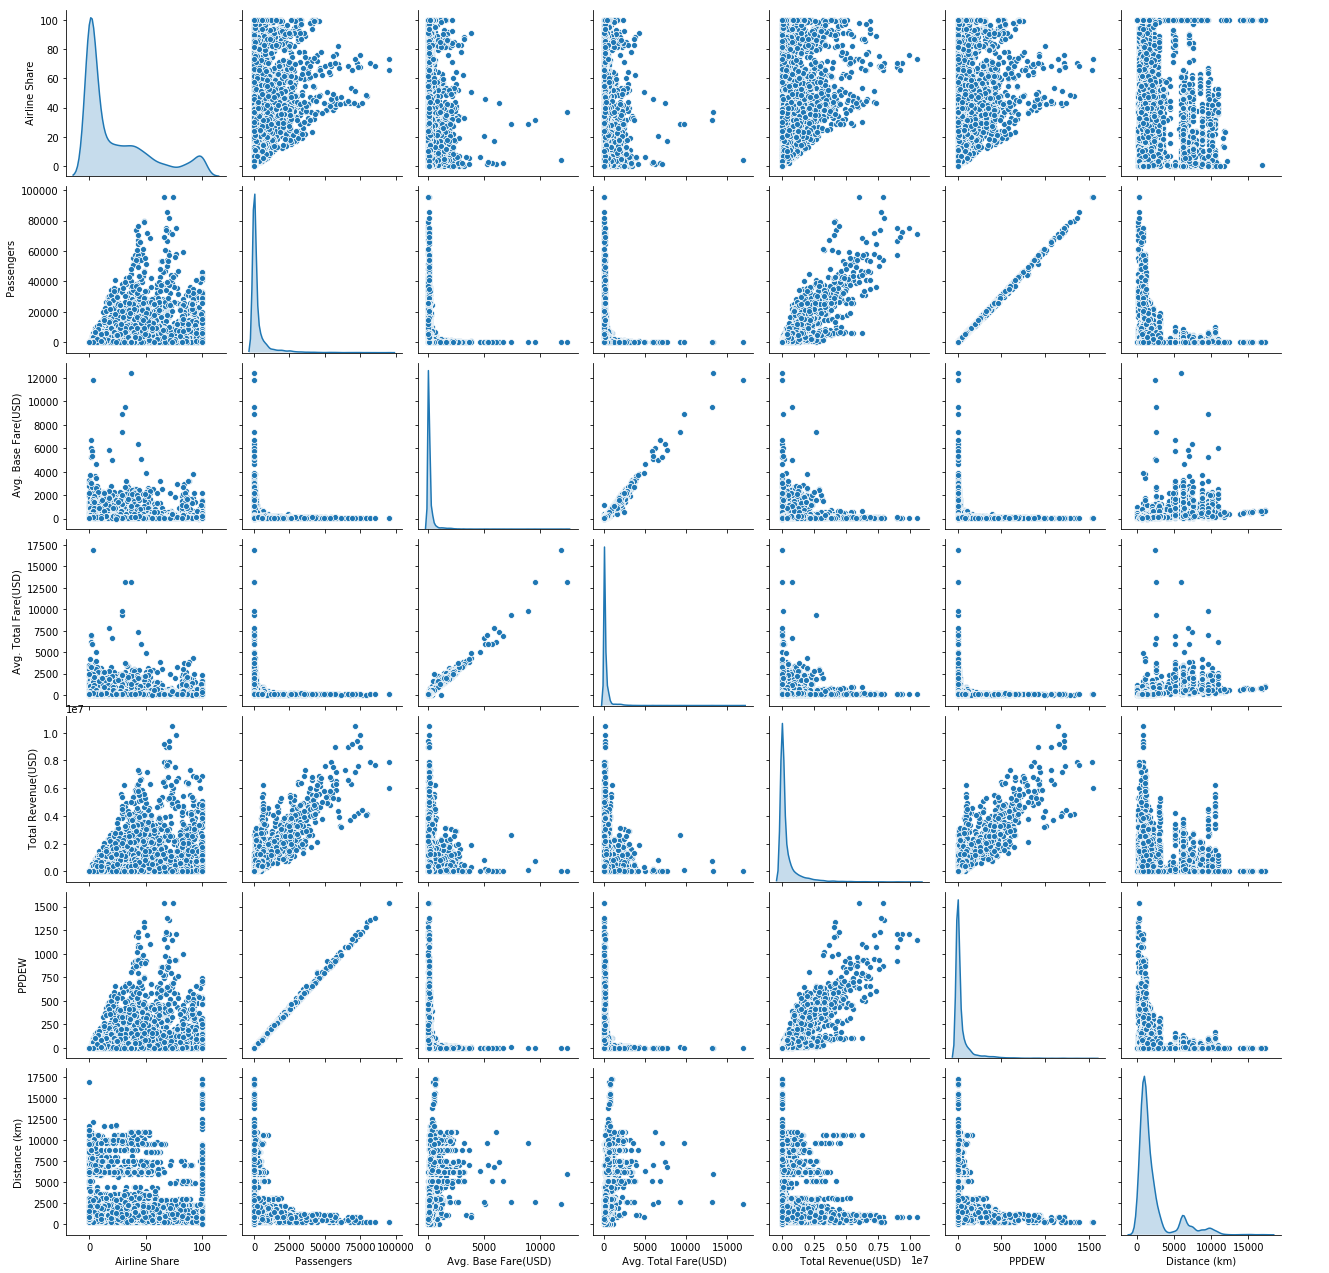

In [24]:
sns.pairplot(train_dataset[[' Airline Share', ' Passengers', ' Avg. Base Fare(USD)',
       ' Avg. Total Fare(USD)', ' Total Revenue(USD)',
       ' PPDEW', 'Distance (km)']],diag_kind="kde")

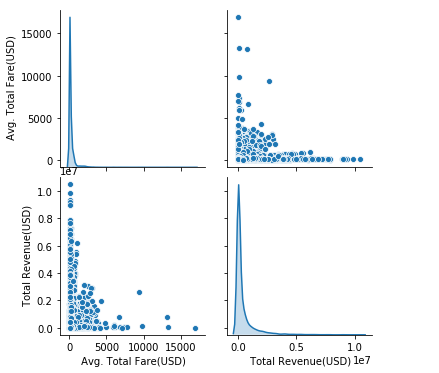

In [25]:
sns.pairplot(train_dataset[[' Avg. Total Fare(USD)', ' Total Revenue(USD)',
       ]],diag_kind="kde")

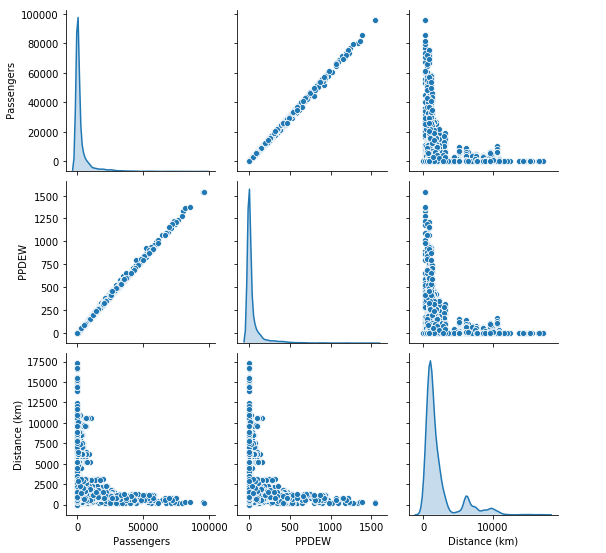

In [26]:
sns.pairplot(train_dataset[[' Passengers', 
       ' PPDEW', 'Distance (km)']],diag_kind="kde")

In [27]:
train_stats = train_dataset.describe()
train_stats.pop(' Total Revenue(USD)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Airline Share,10019.0,24.435612,30.271543,0.00,0.300,8.82,40.450,100.00
Passengers,10019.0,2998.437941,7502.725539,0.15,7.285,145.09,2386.335,95646.26
Avg. Base Fare(USD),10019.0,208.650433,434.827075,4.90,66.990,96.13,167.720,12380.23
Avg. Total Fare(USD),10019.0,283.745092,530.458192,9.45,102.680,137.04,238.805,16942.07
PPDEW,10019.0,49.203952,123.001208,0.00,0.100,2.40,38.900,1542.70
Distance (km),10019.0,2225.600958,2432.845769,0.00,852.000,1245.00,2258.000,17278.00
OTP,10019.0,0.009682,0.097923,0.00,0.000,0.00,0.000,1.00
IAS,10019.0,0.002296,0.047860,0.00,0.000,0.00,0.000,1.00
BVA,10019.0,0.001497,0.038666,0.00,0.000,0.00,0.000,1.00
MAD,10019.0,0.028745,0.167098,0.00,0.000,0.00,0.000,1.00


In [28]:
train_dataset.columns.tolist

<bound method IndexOpsMixin.tolist of Index([' Airline Share', ' Passengers', ' Avg. Base Fare(USD)',
       ' Avg. Total Fare(USD)', ' Total Revenue(USD)', ' PPDEW',
       'Distance (km)', 'OTP', 'IAS', 'BVA',
       ...
       'YA', 'YI', 'YO', 'YV', 'YW', 'YY', 'ZB', 'ZV', 'ZY', 'ZZ'],
      dtype='object', length=674)>

In [29]:
test_dataset.columns.tolist

<bound method IndexOpsMixin.tolist of Index([' Airline Share', ' Passengers', ' Avg. Base Fare(USD)',
       ' Avg. Total Fare(USD)', ' Total Revenue(USD)', ' PPDEW',
       'Distance (km)', 'OTP', 'IAS', 'BVA',
       ...
       'YA', 'YI', 'YO', 'YV', 'YW', 'YY', 'ZB', 'ZV', 'ZY', 'ZZ'],
      dtype='object', length=674)>

In [30]:
train_labels = train_dataset.pop(' Total Revenue(USD)')

In [31]:
test_labels = test_dataset.pop(' Total Revenue(USD)')

In [32]:
train_labels
test_labels

0           102.0
13          487.0
21          109.0
25          582.0
26          652.0
27          657.0
28          253.0
35          389.0
41          243.0
43          129.0
52          957.0
55          421.0
60          377.0
62          215.0
63          108.0
73          139.0
75          144.0
77          138.0
78          316.0
79          478.0
80          178.0
81          109.0
89          719.0
91          633.0
93          946.0
99          131.0
100         122.0
101         325.0
106         129.0
107         397.0
           ...   
12372       874.0
12373      1187.0
12380    778983.0
12398       388.0
12401       182.0
12406       728.0
12409       988.0
12411      1115.0
12418       619.0
12419       694.0
12422       555.0
12423      1623.0
12424       834.0
12429       494.0
12430      3041.0
12435       471.0
12444      1318.0
12445       808.0
12447      2734.0
12458       748.0
12469    151665.0
12470       265.0
12477       654.0
12481    391043.0
12483    4

In [33]:
#def norm(x):
#    return (x - train_stats['mean'])/train_stats['std']
#normed_train_data = norm(train_dataset)
#normed_test_data = norm(test_dataset)
#normed_train_data
#Algunos valores al normalizar se vuelven Nan

### Creación del Modelo

<b>Primeros pasos</b>

In [34]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation=tf.nn.relu,input_shape=[len(train_dataset.keys())]),
        layers.Dense(64,activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae','mse'])
    return model
    

In [35]:
model = build_model()

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                43136     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 47,361
Trainable params: 47,361
Non-trainable params: 0
_________________________________________________________________


<b>Ara probaremos a ver si el modelo responde ante la entrada de datos</b>

In [37]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ -34.752117],
       [ -18.22887 ],
       [-245.76122 ],
       [ -85.411835],
       [-319.4567  ],
       [ -66.639496],
       [ -17.099953],
       [ -80.331985],
       [ -13.435909],
       [-192.06342 ]], dtype=float32)

### Entrenamiento del Modelo

<b>Creamos PrintDot() para comprovar que el modelo está entrenando</b>

In [143]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs):
        if epoch%100==0: print('')
        print('.',end='')
        
EPOCHS = 1000

history = model.fit(
    train_dataset, train_labels,
    epochs=EPOCHS, validation_split=0.45, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [144]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,3.539657e+10,97399.766609,3.539657e+10,3.388462e+10,96570.590780,3.388462e+10,995
996,3.633424e+10,97398.585637,3.633424e+10,4.406794e+10,104987.276099,4.406794e+10,996
997,3.510299e+10,98251.344150,3.510299e+10,5.691409e+10,99687.793595,5.691409e+10,997
998,3.475061e+10,97295.816697,3.475061e+10,5.311846e+10,112607.596385,5.311846e+10,998
999,3.544704e+10,98097.843084,3.544704e+10,6.559346e+10,107009.132530,6.559346e+10,999


In [145]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Val Error')
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Val Error')
    plt.legend()


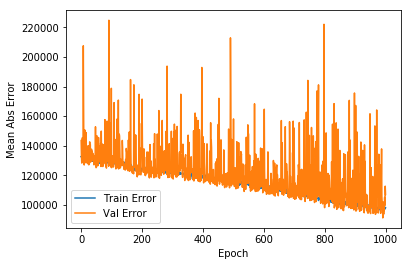

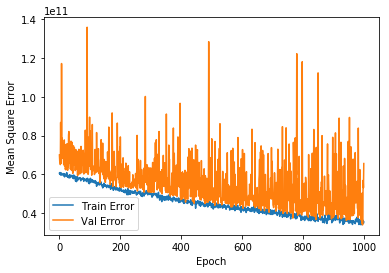

In [146]:
plot_history(history)

In [147]:
loss, mae, mse = model.evaluate(test_dataset,test_labels,verbose=0)
print('Testing set MAE {:5.2f} USD in Total Revenue'.format(mae))

Testing set MAE 102085.46 USD in Total Revenue


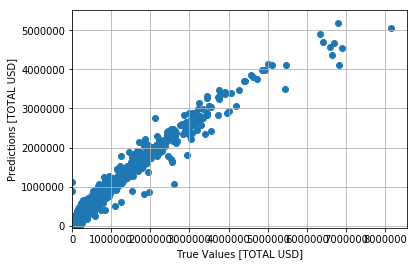

### RESULTADOS CON EARLY STOP

<b>Con EarlyStopping(), indicamos una paciencia al modelo para que pare en f(patience)</b>


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................

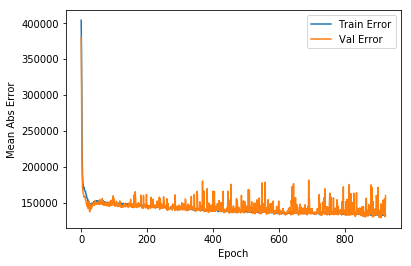

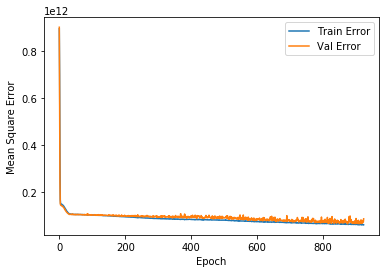

In [139]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=50) #patience = 10
history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                   validation_split=0.50, verbose=0,
                   callbacks=[early_stop, PrintDot()])
plot_history(history)

In [140]:
loss, mae, mse = model.evaluate(test_dataset,test_labels,verbose=0)
print('Testing set MAE {:5.2f} USD in Total Revenue'.format(mae))

Testing set MAE 150683.23 USD in Total Revenue


In [141]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
919,6.181508e+10,133218.237395,6.181508e+10,6.850206e+10,135518.297639,6.850206e+10,919
920,6.014874e+10,131777.164233,6.014874e+10,7.549284e+10,155112.607179,7.549284e+10,920
921,6.013395e+10,133222.098674,6.013395e+10,7.786957e+10,130339.024014,7.786957e+10,921
922,6.030748e+10,131675.547970,6.030748e+10,7.063819e+10,135796.936867,7.063819e+10,922
923,5.898799e+10,132496.746347,5.898799e+10,8.478673e+10,159794.157036,8.478673e+10,923


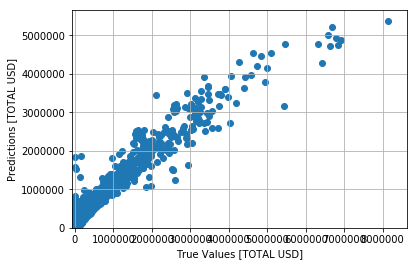

In [142]:
test_predictions = model.predict(test_dataset).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [TOTAL USD]')
plt.ylabel('Predictions [TOTAL USD]')
plt.axis('equal')
plt.axis('equal')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.grid(True)
_ = plt.plot([-100,100],[-100,100])

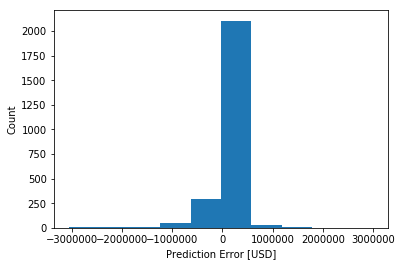

In [46]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel("Prediction Error [USD]")
_ = plt.ylabel("Count")

In [1]:
#correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1)) 
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

NameError: name 'tf' is not defined